## Frequency Plot for CM/EM and Naive CD4 T cells 
## Modality : Flow Cytometry

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(lme4)
quiet_library(ggpubr)
options(warn = -1)

In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")
coolors_clrs<-c("#EFB0A1","#009FF5","#1A5E9B","#42E2B8","#4ECDC4","#89B6A5","#F1D26A","#D5B0AC","#EDABB1","#02504D","#AA9674","#E64B35FF","#4DBBD5FF","#00A087FF")

cluster_colors_ext <- colorRampPalette(cluster_colors)(36)
options(repr.plot.width =5, repr.plot.height =5)

In [4]:
fig_path="/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/"

In [5]:
#' # Example usage of PlotFreqLinePlot function
#' # This function plots frequency line plots with model predictions.
#' PlotFreqLinePlot(frequency_table, model_fit, palette, fig_path = "path/to/save", fig_name = "fig_name",
#'                  x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
#'                  shape_var = "sex", title = "Cluster 9", x_label = "Days to Conversion", 
#'                  y_label = "CLR", annotation_text = "p=0.055", annotation_x = -600, 
#'                  annotation_y = 1, annotation_color = "red")
#'
#' @export
#' @param frequency_table The input data frame containing frequency values to plot.
#' @param model_fit A fitted model object for predictions.
#' @param palette A color palette for the plot.
#' @param fig_path The file path where the plot will be saved (optional).
#' @param fig_name The name of the file where the plot will be saved (optional).
#' @param x_var The variable for the x-axis (default is "days_to_conversion").
#' @param y_var The variable for the y-axis (default is "clr").
#' @param color_var The variable to determine line colors (default is "subject.subjectGuid").
#' @param shape_var The variable to determine point shapes (default is "sex").
#' @param title The title of the plot.
#' @param x_label The x-axis label (default is "Days to Conversion").
#' @param y_label The y-axis label (default is "CLR").
#' @param annotation_text Text for annotation on the plot.
#' @param annotation_x X coordinate for the annotation.
#' @param annotation_y Y coordinate for the annotation.
#' @param annotation_color Color of the annotation text.
#' 
#' @return A ggplot object with the frequency line plot.
PlotFreqLinePlot <- function(frequency_table, model_fit, palette, fig_path = NULL, fig_name = NULL,
                             x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
                             shape_var = "sex", title = "Cluster 9", x_label = "Days to Conversion", 
                             y_label = "CLR", annotation_text = "p=0.055", annotation_x = -600, 
                             annotation_y = 1, annotation_color = "red") {
    require(ggplot2)
    require(ggeffects)

    # Extract the prediction data frame
    pred.mm <- ggpredict(model_fit, terms = c(x_var))  # Adjusted to use x_var

    # plot
    p1 <- frequency_table %>%
        ggplot() +
        geom_line(aes(x = .data[[x_var]], y = .data[[y_var]], color = .data[[color_var]]), size = 1) + 
        geom_point(aes(x = .data[[x_var]], y = .data[[y_var]], shape = .data[[shape_var]])) + 
        geom_line(data=pred.mm, aes(x = x, y = predicted), color="#8F7700FF", size = 2) +          
        #geom_ribbon(data=pred.mm, aes(x = x, ymin = predicted - std.error, ymax = predicted + std.error), 
                    #fill = "#8F7700FF", alpha = 0.3, size = 10) + 
        geom_ribbon(data=pred.mm, aes(x = x, ymin = predicted - 3 * std.error, ymax = predicted + 3 * std.error), 
                fill = "#8F7700FF", alpha = 0.3) + 
        annotate(geom="text", x= annotation_x, y=annotation_y, label=annotation_text, size = 6,
                    color=annotation_color) +
        labs(title = title) + xlab(x_label) +  ylab(y_label)+
        scale_color_manual(values = palette) + theme_minimal() +
        theme_light()+
        theme(
            text = element_text(size = 10, face = "bold"),  
            axis.title = element_text(size = 10, face = "bold"),  
            axis.text = element_text(size = 10, face = "bold"),  
            plot.title = element_text(size = 10, face = "bold"),  
            legend.position="top") +
        scale_shape_manual(values = c(1, 2))  + guides(color = FALSE)

    # Code to save the plot if fig_path and proj_name are provided
        # Check if fig_path and proj_name are provided and not empty
    if (!missing(fig_path) && !missing(fig_name) && nzchar(fig_path) && nzchar(fig_name)) {
        # Construct the full file path with the project name and desired file extension
        file_name <- paste0(fig_path, "/", fig_name)
        # Use ggsave to save the plot
        ggsave(file_name, plot = p1, width = 4, height = 4, dpi = 300)
    }
    return(p1)
}


In [6]:
# reading Frequency results
flow_file=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/pre-ra_flow_freq_tbl_clr_trans_cluster_res_recluster_v3_Aim3.csv")
flow_file%>%head(3)
flow_file%>%dim
flow_file%>%colnames%>%sort

,sample_id,l1_labels,cluster,counts,cell_type_total,frequency,leiden_res,sample.sampleKitGuid,pseudo_counts,pseudo_total_counts,frequency_live_pseudocount,batch,labels,subject.subjectGuid,days_to_conversion,subject.biologicalSex,age_conv,bmi_conv,Status_Long,clr
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>
1,PB00052-02,Other cells,c0,33,334,0.0988024,leiden_res_1.0,KT00052,34,335,0.1014925,PS1,c0_Other cells_leiden_res_1.0_PS1,CU1009,-714,Female,58,25.64892,pre,1.067584
2,PB00056-02,Other cells,c0,204,1630,0.1251534,leiden_res_1.0,KT00056,205,1631,0.1256898,PS1,c0_Other cells_leiden_res_1.0_PS1,CU1007,-632,Female,44,26.19498,pre,1.540074
3,PB00057-02,Other cells,c0,53,365,0.1452055,leiden_res_1.0,KT00057,54,366,0.1475410,PS1,c0_Other cells_leiden_res_1.0_PS1,CU1003,-615,Female,23,23.14306,pre,1.349503


[1] 11376    20

[1] "age_conv"                   "batch"                     
 [3] "bmi_conv"                   "cell_type_total"           
 [5] "clr"                        "cluster"                   
 [7] "counts"                     "days_to_conversion"        
 [9] "frequency"                  "frequency_live_pseudocount"
[11] "l1_labels"                  "labels"                    
[13] "leiden_res"                 "pseudo_counts"             
[15] "pseudo_total_counts"        "sample_id"                 
[17] "sample.sampleKitGuid"       "Status_Long"               
[19] "subject.biologicalSex"      "subject.subjectGuid"

# Naive CD4 T cell Cluster

In [7]:
flow_file_cluster0_PT1 <- flow_file %>%
  filter(batch == "PT1" & cluster == "c0" & leiden_res=="leiden_res_2")
flow_file_cluster0_PT1%>%head(3)
flow_file_cluster0_PT1%>%dim

,sample_id,l1_labels,cluster,counts,cell_type_total,frequency,leiden_res,sample.sampleKitGuid,pseudo_counts,pseudo_total_counts,frequency_live_pseudocount,batch,labels,subject.subjectGuid,days_to_conversion,subject.biologicalSex,age_conv,bmi_conv,Status_Long,clr
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>
1,PB00056-02,total_t_cells,c0,2645,40000,0.066125,leiden_res_2,KT00056,2646,40001,0.06614835,PT1,c0_total_t_cells_leiden_res_2_PT1,CU1007,-632,Female,44,26.19498,pre,1.759625
2,PB00057-02,total_t_cells,c0,3162,40000,0.079050,leiden_res_2,KT00057,3163,40001,0.07907302,PT1,c0_total_t_cells_leiden_res_2_PT1,CU1003,-615,Female,23,23.14306,pre,1.804493
3,PB00082-02,total_t_cells,c0,2289,40000,0.057225,leiden_res_2,KT00082,2290,40001,0.05724857,PT1,c0_total_t_cells_leiden_res_2_PT1,CU1007,-540,Female,44,26.19498,pre,1.649195


[1] 52 20

In [8]:
# Fit the linear mixed-effects model
model_cluster0_PT1 <- lmerTest::lmer(clr ~ days_to_conversion  + age_conv + bmi_conv + (1|subject.subjectGuid), data = flow_file_cluster0_PT1)

Loading required package: ggeffects



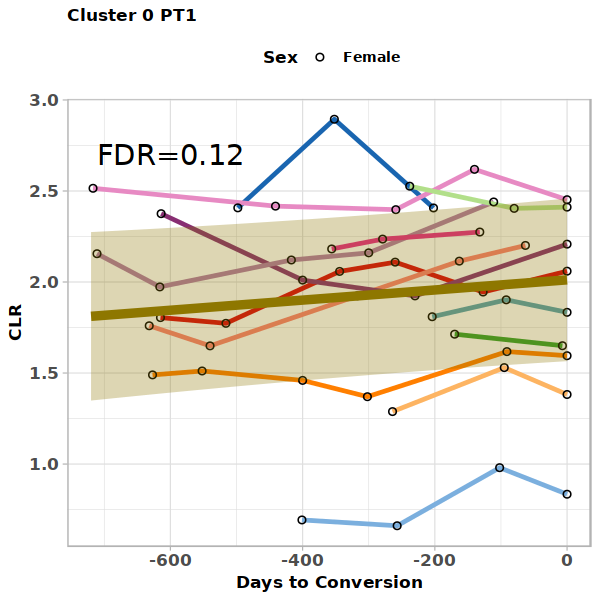

In [9]:
#plotting
PlotFreqLinePlot(flow_file_cluster0_PT1 %>% mutate(Sex=subject.biologicalSex), model_fit=model_cluster0_PT1, palette=cluster_colors,
                 fig_path = fig_path,fig_name ="Flow_Fig_C0_PT1_lineplot_.pdf",
                  x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
                  shape_var = "Sex", title = "Cluster 0 PT1", x_label = "Days to Conversion", 
                  y_label = "CLR", annotation_text = "FDR=0.12", annotation_x = -600, 
                  annotation_y =2.7, annotation_color = "black")

# CM/EM CD4 T cell cluster

In [10]:
flow_file_cluster4_PT1 <- flow_file %>%
  filter(batch == "PT1" & cluster == "c4" & leiden_res=="leiden_res_2")
flow_file_cluster4_PT1%>%head(3)
flow_file_cluster4_PT1%>%dim

,sample_id,l1_labels,cluster,counts,cell_type_total,frequency,leiden_res,sample.sampleKitGuid,pseudo_counts,pseudo_total_counts,frequency_live_pseudocount,batch,labels,subject.subjectGuid,days_to_conversion,subject.biologicalSex,age_conv,bmi_conv,Status_Long,clr
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>,<dbl>
1,PB00056-02,total_t_cells,c4,2768,40000,0.069200,leiden_res_2,KT00056,2769,40001,0.06922327,PT1,c4_total_t_cells_leiden_res_2_PT1,CU1007,-632,Female,44,26.19498,pre,1.805062
2,PB00057-02,total_t_cells,c4,1447,40000,0.036175,leiden_res_2,KT00057,1448,40001,0.03619910,PT1,c4_total_t_cells_leiden_res_2_PT1,CU1003,-615,Female,23,23.14306,pre,1.023156
3,PB00082-02,total_t_cells,c4,2670,40000,0.066750,leiden_res_2,KT00082,2671,40001,0.06677333,PT1,c4_total_t_cells_leiden_res_2_PT1,CU1007,-540,Female,44,26.19498,pre,1.803096


[1] 52 20

In [11]:
# Fit the linear mixed-effects model
model_cluster4_PT1 <- lmerTest::lmer(clr ~ days_to_conversion  + age_conv + bmi_conv + (1|subject.subjectGuid), data = flow_file_cluster4_PT1)

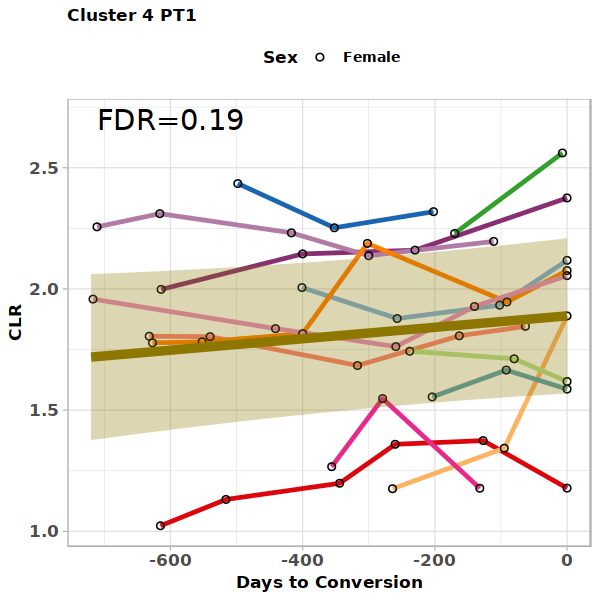

In [12]:
#plotting
## pvalue based on adam's result csv file
PlotFreqLinePlot(flow_file_cluster4_PT1 %>% mutate(Sex=subject.biologicalSex), model_fit=model_cluster4_PT1, palette=cluster_colors,
                 fig_path = fig_path,fig_name ="Flow_Fig_C4_PT1_lineplot_.pdf",
                  x_var = "days_to_conversion", y_var = "clr", color_var = "subject.subjectGuid",
                  shape_var = "Sex", title = "Cluster 4 PT1", x_label = "Days to Conversion", 
                  y_label = "CLR", annotation_text = "FDR=0.19", annotation_x = -600, 
                  annotation_y =2.7, annotation_color = "black")

In [13]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggeffects_1.7.0             lme4_1.1-34                
 [3] plotly_4.10.4               knitr_1.47                 
 [5] ggpubr_0.6.0                SeuratDisk_0.0.0.9021      
 [7] SingleCellExperiment_1.22.0 SummarizedExperiment_1.30.2
 [9] Biobase_2.60.0              Genomi